In [2]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

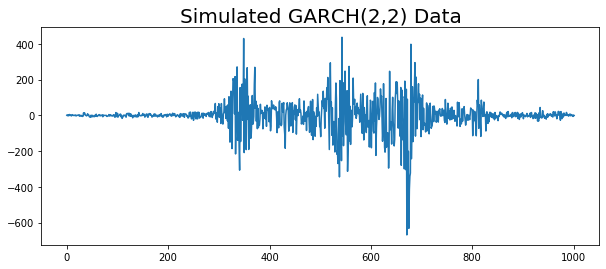

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

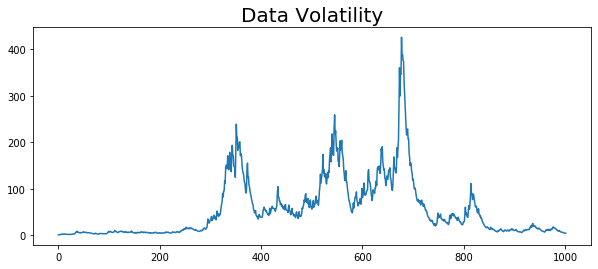

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

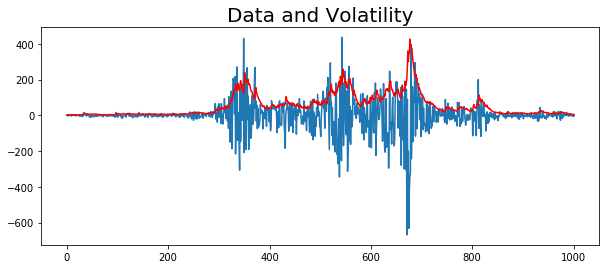

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

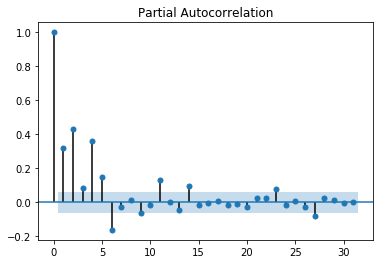

In [7]:
plot_pacf(np.array(series)**2)
plt.show()

In [8]:
#Fit the GARCH Model

In [9]:
train, test = series[:-test_size], series[-test_size:]

In [10]:
model = arch_model(train, p=2, q=2)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4721.298749191061
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4698.7514557345185
Iteration:      3,   Func. Count:     26,   Neg. LLF: 4655.932384401309
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4649.046037319197
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4631.249588690405
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4616.444614362226
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4600.0267068314915
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4595.543563739586
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4591.619788687134
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4590.708918547527
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4587.960956102407
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4582.41010959843
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4565.9674945698835
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4553.357

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -4411.03
Distribution:                  Normal   AIC:                           8834.05
Method:            Maximum Likelihood   BIC:                           8862.88
                                        No. Observations:                  902
Date:                Tue, Jul 21 2020   Df Residuals:                      896
Time:                        18:25:32   Df Model:                            6
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3479      0.314     -1.109      0.267 [ -0.963,  0.267]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.5490      1.064      1.456      0.145    [ -0.536,  3.634]
alpha[1]       0.0849  4.826e-02      1.759  7.856e-02 [-9.692e-03,  0.179]
alpha[2]       0.2026  5.421e-02      3.737  1.865e-04  [9.631e-02,  0.309]
beta[1]        0.3794      0.489      0.776      0.438    [ -0.579,  1.338]
beta[2]        0.3331      0.402      0.829      0.407    [ -0.455,  1.121]
===========================================================================

Covariance estimator: robust
"""

In [13]:
#predict
predictions = model_fit.forecast(horizon=test_size)

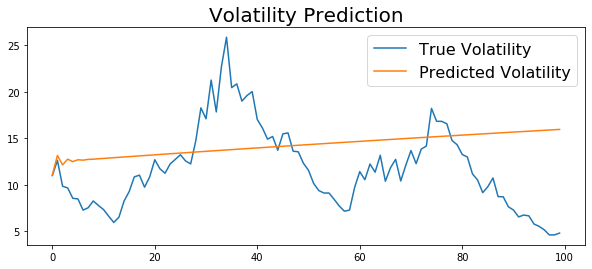

In [14]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

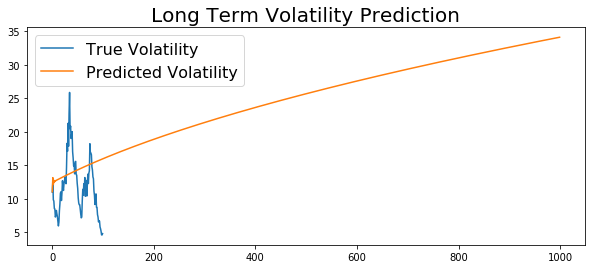

In [15]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [16]:
#ROLLING FORECAST ORIGIN

In [17]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

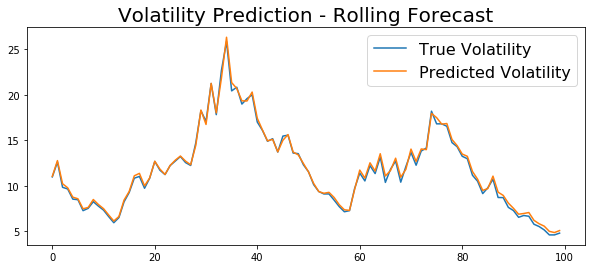

In [18]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)